<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/SVM/digitClassification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST digit classification using SVC

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)

In [ ]:
print(mnist.target)
print(mnist.data.shape)

['5' '0' '4' ... '4' '5' '6']
(70000, 784)


In [ ]:
import pandas as pd
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

X = mnist_df[0:2000]
Y = mnist.target[0:2000]

X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Plotting the frequency distribution of all digits in Sample data

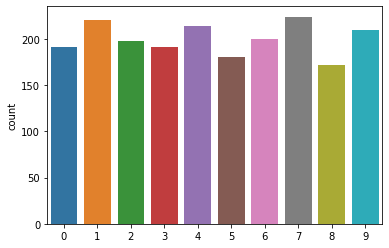

In [ ]:
import seaborn as sns
sns.countplot(Y)
plt.show()

- Scaling the data such that mean is subtracted from each pixel and variance becomes 1.
- Splitting into train & test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

print(X_train.shape)

(1600, 784)


Using grid search to find the best linear SVC

In [ ]:
svc_linear = svm.SVC(kernel='linear')
parameters = {'C':[0.001, 0.1, 100, 10e5]}
grid_linear = GridSearchCV(svc_linear, parameters, cv=10, scoring='accuracy', return_train_score=False)

grid_linear.fit(X_train, y_train)
print(grid)

print("---------------------------------------------------------------------------------")
# examine the best model
print(grid_linear.best_score_)
print(grid_linear.best_params_)
print(grid_linear.best_estimator_)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 100, 1000], 'degree': [2, 3],
                         'gamma': [10, 1, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
---------------------------------------------------------------------------------
0.9018750000000001
{'C': 0.001}
SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
   

Using grid search to find best SVC with polynomial kernel.

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svc_poly = svm.SVC(kernel='poly')
parameters = {'C':[0.01, 0.1, 1, 100, 1000], 'gamma':[10,1,0.1,0.01], 'degree':[2,3]}
grid_poly = GridSearchCV(svc_poly, parameters, cv=10, scoring='accuracy', return_train_score=False)

grid_poly.fit(X_train, y_train)
print(grid_poly)

print("---------------------------------------------------------------------------------")
# examine the best model
print(grid_poly.best_score_)
print(grid_poly.best_params_)
print(grid_poly.best_estimator_)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 100, 1000], 'degree': [2, 3],
                         'gamma': [10, 1, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
---------------------------------------------------------------------------------
0.9299999999999999
{'C': 0.01, 'degree': 2, 'gamma': 10}
SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=10, k

Using grid search to find best SVC with radial kernel

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svc_rbf = svm.SVC(kernel='rbf')
parameters = {'C':[0.01, 0.1, 1, 100, 1000], 'gamma':[10,1,0.1,0.01]}
grid_rbf = GridSearchCV(svc_rbf, parameters, cv=10, scoring='accuracy', return_train_score=False)

grid_rbf.fit(X_train, y_train)
print(grid_rbf)

print("---------------------------------------------------------------------------------")
# examine the best model
print(grid_rbf.best_score_)
print(grid_rbf.best_params_)
print(grid_rbf.best_estimator_)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
---------------------------------------------------------------------------------
0.11187500000000002
{'C': 0.01, 'gamma': 10}
SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, p

In [ ]:
print("linear kernel's best estimator's score for test and train data :")
print(grid_linear.score(X_test, y_test))
print(grid_linear.score(X_train, y_train))
print("\npoly kernel's best estimator's score for test and train data :")
print(grid_poly.score(X_test, y_test))
print(grid_poly.score(X_train, y_train))
print("\nrbf kernel's best estimator's score for test and train data :")
print(grid_rbf.score(X_test, y_test))
print(grid_rbf.score(X_train, y_train))

linear kernel's best estimator's score for test and train data :
0.905
1.0

poly kernel's best estimator's score for test and train data :
0.9125
1.0

rbf kernel's best estimator's score for test and train data :
0.1125
0.111875


Clearly, polynomial kernel works best

[[ 0.72389659  6.10637692  1.74071325 -0.26967498  9.29851436  6.20713226
   5.02053649  2.81882175  5.20158644  8.19860314]
 [ 6.18088326  1.7178863  -0.29790961  8.30635564  2.70298052  9.31958073
   3.72577836  0.69446236  7.27489131  4.75542472]
 [ 0.72153133  1.70586131  6.09351143 -0.29421074  9.31123562  3.87362729
   4.89603156  7.11803654  2.82574225  8.29286553]
 [ 3.78305989  2.77742263  2.75916755  0.73548741  7.24128569  6.01501877
   2.7601915   9.29592584  0.73846612  8.2853569 ]
 [ 3.91222539 -0.2955251   8.27803525  0.72216275  6.23431079  3.74323321
   9.30875244  1.71004447  7.27306969  3.8136481 ]]


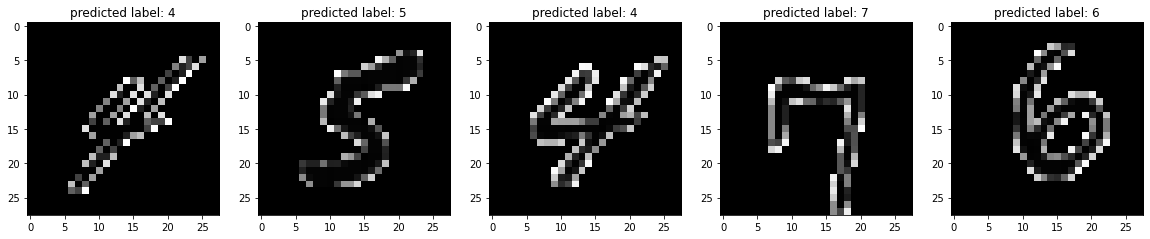

In [ ]:
poly_decision_function_output = grid_poly.decision_function(X_test.head(5))
print(poly_decision_function_output)

y_pred = grid_poly.predict(X_test.head(5))

fig, axs = plt.subplots(ncols=5,figsize=(20, 6))
for i in range(0, 5):
  two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
  axs[i].set_title('predicted label: '+y_pred[i])
  axs[i].imshow(two_d, interpolation='nearest', cmap='gray')
plt.show()
